In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0, 0.5, 'Average Read Latency (Cycles)')

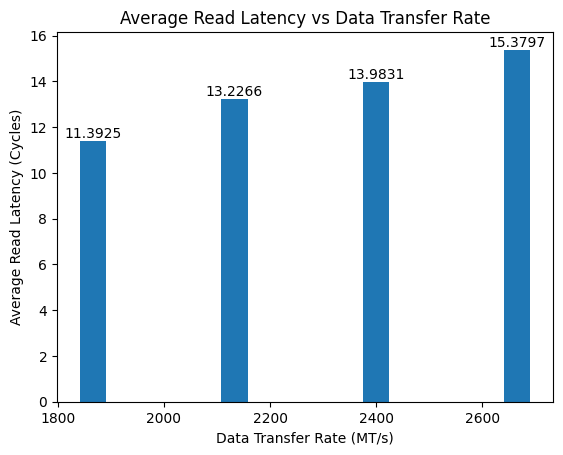

In [113]:
megatransfers = [1866, 2133, 2400, 2666]
readLatencies = [11.3925, 13.2266, 13.9831, 15.3797]
bandwidths = [1.11165, 1.26539, 1.43309, 1.58595]

bars = plt.bar(x = megatransfers, height = readLatencies, width = 50)
axes = plt.gca()
axes.bar_label(bars)

plt.title("Average Read Latency vs Data Transfer Rate")
plt.xlabel("Data Transfer Rate (MT/s)")
plt.ylabel("Average Read Latency (Cycles)")


Text(0, 0.5, 'Bandwidth (GB/s)')

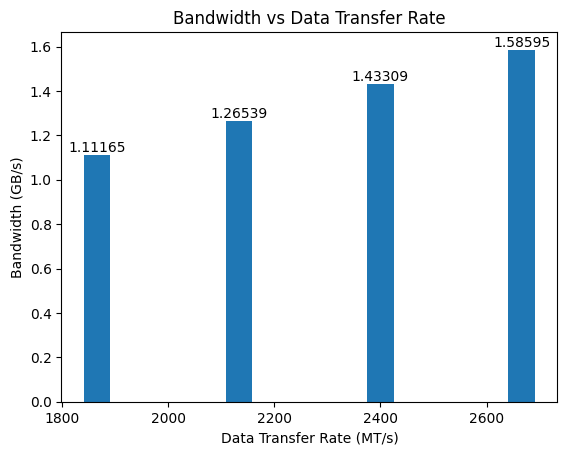

In [114]:
bars = plt.bar(x = megatransfers, height = bandwidths, width = 50)
axes = plt.gca()
axes.bar_label(bars)

plt.title("Bandwidth vs Data Transfer Rate")
plt.xlabel("Data Transfer Rate (MT/s)")
plt.ylabel("Bandwidth (GB/s)")


([<matplotlib.axis.XTick at 0x16c330700>,
 [Text(10, 0, '0-19'),
  Text(30, 0, '20-39'),
  Text(50, 0, '40-59'),
  Text(70, 0, '60-79'),
  Text(90, 0, '80-99'),
  Text(110, 0, '100-119'),
  Text(130, 0, '120-139'),
  Text(150, 0, '140-159'),
  Text(170, 0, '160-179'),
  Text(190, 0, '180-199'),
  Text(210, 0, '200-')])

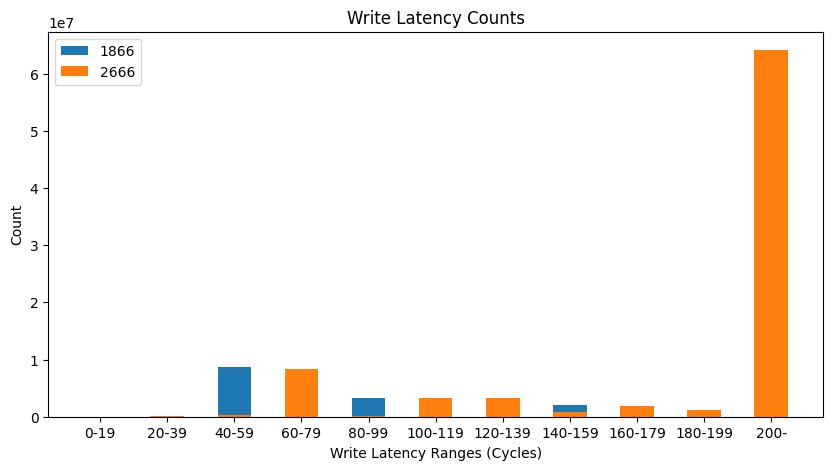

In [115]:
width = 10
xLocations = np.array([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210])
xLabels = ["0-19", "20-39", "40-59", "60-79", "80-99", "100-119", "120-139", "140-159", "160-179", "180-199", "200-"]

plt.figure(figsize = (10, 5))
writeLatencies1866 = [0, 79057, 8635563, 106610, 3292920, 2925842, 882330, 1996995, 977789, 1166765, 63393291]
writeLatencies2666 = [1, 73686, 214928, 8380866, 140172, 3295787, 3189563, 835315, 1856418, 1224479, 64127483]
plt.bar(xLocations, writeLatencies1866, width = width, label = "1866")
plt.bar(xLocations, writeLatencies2666, width = width, label = "2666")
plt.legend()
plt.xlabel("Write Latency Ranges (Cycles)")
plt.ylabel("Count")
plt.title("Write Latency Counts")
plt.xticks(xLocations, xLabels)

In [116]:
print("2666")
print("Read hit rate =", 95417071 / 239211449)
print("Write hit rate =", 82789477 / 136540512)

print()
print("1866")
print("Read hit rate =", 94225376 / 239211449)
print("Write hit rate =", 82746759 / 136540512)

2666
Read hit rate = 0.39888170653571015
Write hit rate = 0.6063363597171805

1866
Read hit rate = 0.3938999424730712
Write hit rate = 0.6060235001901854


In [117]:
optimizations = ["Timing parameters", "Refresh Policy", "Address Mapping", "Page Interleaving",
                 "Timing parameters", "Refresh Policy", "Address Mapping", "Page Interleaving"]

degree = [16, 16, 16, 16, 2, 2, 2, 2]

readHits = [39.80, 40.42,
            41.56, 42.30,
            36.92, 37.08,
            39.80, 40.42]

totalReads16 = 239211449
totalReads2 = 178432470

totalWrites16 = 136540512
totalWrites2 = 99892716

readHits16 = [95212331, 99430226, 88321194, 95217613]
readHits2 = [72127117, 75469864, 66170669, 72116258]

writeHits16 = [82751957, 83384271, 78436840, 82745515]
writeHits2 = [55143794, 55501280, 52318996, 55144136]

readHitRates = []
writeHitRates = []

for i in range(len(readHits16)):
    readHitRates.append(readHits16[i] / totalReads16)
    writeHitRates.append(writeHits16[i] / totalWrites16)

for i in range(len(readHits2)):
    readHitRates.append(readHits2[i] / totalReads2)
    writeHitRates.append(writeHits2[i] / totalWrites2)

results = {"Optimization": optimizations,
           "Degree": degree,
           "Read Hit Rates": readHitRates, "Write Hit Rates": writeHitRates}
df = pd.DataFrame(results)

df


,Optimization,Degree,Read Hit Rates,Write Hit Rates
0,Timing parameters,16,0.398026,0.606062
1,Refresh Policy,16,0.415658,0.610693
2,Address Mapping,16,0.369218,0.574458
3,Page Interleaving,16,0.398048,0.606014
4,Timing parameters,2,0.404226,0.552030
5,Refresh Policy,2,0.422960,0.555609
6,Address Mapping,2,0.370844,0.523752
7,Page Interleaving,2,0.404166,0.552034


In [118]:
totalReads16 = 239211449
totalReads2 = 178432470

totalWrites16 = 136540512
totalWrites2 = 99892716

readHit16 = 95209165
writeHit16 = 82748524

readHit2 = 72119005
writeHit2 = 55146941

print("Read hit rate 16:", readHit16 / totalReads16)
print("Write hit rate 16:", writeHit16 / totalWrites16)
print("Read hit rate 2:", readHit2 / totalReads2)
print("Write hit rate 2:", writeHit2 / totalWrites2)

Read hit rate 16: 0.3980125758947265
Write hit rate 16: 0.6060364267566244
Read hit rate 2: 0.4041809486804728
Write hit rate 2: 0.552061683856909


[Text(0, 0, '0.4042'), Text(0, 0, '0.3980')]

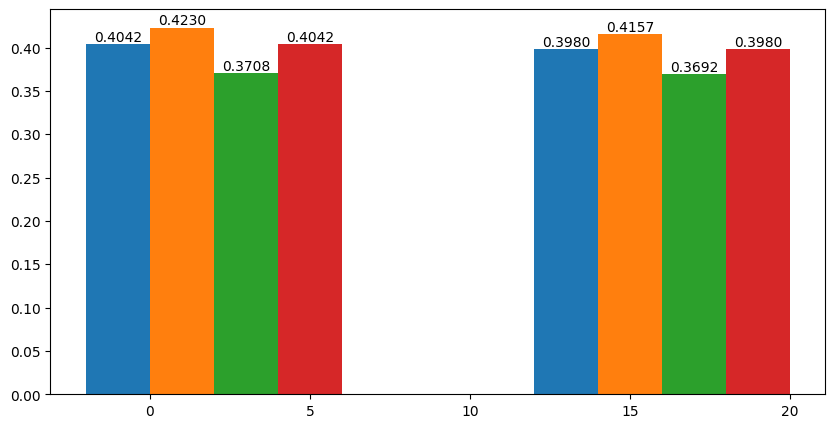

In [119]:
width = 2

xLocations = np.array([2, 16])
plt.figure(figsize = (10, 5))
bars = plt.bar(xLocations - 1.5 * width, [readHitRates[4], readHitRates[0]], width = width, label = "Timing Parameters")
axes = plt.gca()
axes.bar_label(bars, labels=[f"{h:.4f}" for h in [readHitRates[4], readHitRates[0]]])
bars = plt.bar(xLocations - 0.5 * width, [readHitRates[5], readHitRates[1]], width = width, label = "Simultaneous Refresh")
axes = plt.gca()
axes.bar_label(bars, labels=[f"{h:.4f}" for h in [readHitRates[5], readHitRates[1]]])
bars = plt.bar(xLocations + 0.5 * width, [readHitRates[6], readHitRates[2]], width = width, label = "Address Mapping")
axes = plt.gca()
axes.bar_label(bars, labels=[f"{h:.4f}" for h in [readHitRates[6], readHitRates[2]]])
bars = plt.bar(xLocations + 1.5 * width, [readHitRates[7], readHitRates[3]], width = width, label = "Page Interleaving")
axes = plt.gca()
axes.bar_label(bars, labels=[f"{h:.4f}" for h in [readHitRates[7], readHitRates[3]]])



In [120]:
totalReads16 = 239211449
totalReads2 = 178432470

totalWrites16 = 136540512
totalWrites2 = 99892716

base16ReadHit = 95209165
base16WriteHit = 82748524
base16Latency = 13.9831
base16Bw = 1.43309
base16Pwr = 2351.21

base16ReadHitRate = base16ReadHit / totalReads16
base16WriteHitRate = base16WriteHit / totalWrites16

base2ReadHit = 72119005
base2WriteHit = 55146941
base2Latency = 14.2286
base2Bw = 0.773915
base2Pwr = 2114.61

base2ReadHitRate = base2ReadHit / totalReads2
base2WriteHitRate = base2WriteHit / totalWrites2

mod16ReadHit = 96321707
mod16WriteHit = 80573830
mod16Latency = 12.0202
mod16Bw = 1.43309
mod16Pwr = 2365.83

mod16ReadHitRate = mod16ReadHit / totalReads16
mod16WriteHitRate = mod16WriteHit / totalWrites16

mod2ReadHit = 72100039
mod2WriteHit = 54825470
mod2Latency = 12.1771
mod2Bw = 0.773915
mod2Pwr = 2211.11

mod2ReadHitRate = mod2ReadHit / totalReads2
mod2WriteHitRate = mod2WriteHit / totalWrites2


other16ReadHit = 99427458
other16WriteHit = 83385456
other16Latency = 11.1713
other16Bw = 1.43309
other16Pwr = 2337.52

other16ReadHitRate = other16ReadHit / totalReads16
other16WriteHitRate = other16WriteHit / totalWrites16

other2ReadHit = 75469055
other2WriteHit = 55501998
other2Latency = 11.3543
other2Bw = 0.773915
other2Pwr = 2208.85

other2ReadHitRate = other2ReadHit / totalReads2
other2WriteHitRate = other2WriteHit / totalWrites2


In [121]:
optimizations = ["Baseline", "All 4", "Timing + Refresh",
                 "Baseline", "All 4", "Timing + Refresh"]

readhHitRates = [base16ReadHitRate, mod16ReadHitRate, other16ReadHitRate,
             base2ReadHitRate, mod2ReadHitRate, other2ReadHitRate]

writeHitRates = [base16WriteHitRate, mod16WriteHitRate, other16WriteHitRate,
                 base2WriteHitRate, mod2WriteHitRate, other2WriteHitRate]

hitRates = pd.DataFrame({"OPTs": optimizations, "Read Rates": readhHitRates, "Write Rates": writeHitRates})
hitRates

,OPTs,Read Rates,Write Rates
0,Baseline,0.398013,0.606036
1,All 4,0.402663,0.590109
2,Timing + Refresh,0.415647,0.610701
3,Baseline,0.404181,0.552062
4,All 4,0.404075,0.548844
5,Timing + Refresh,0.422956,0.555616


Text(0.5, 1.0, 'Average Bandwidth Results')

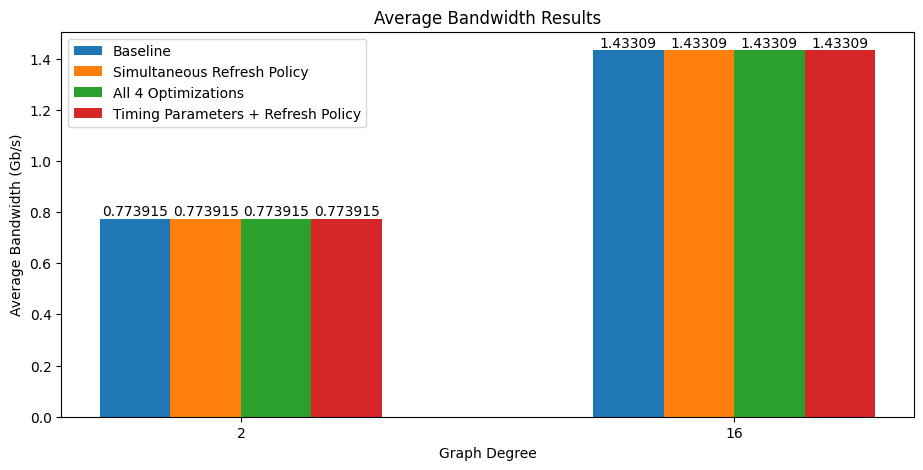

In [122]:
width = 2

degrees = np.array([2, 16])

baseBw = [base2Bw, base16Bw]
modBw = [mod2Bw, mod16Bw]
otherBw = [other2Bw, other16Bw]
refreshBw = [0.773915, 1.43309]

plt.figure(figsize = (11, 5))
bars = plt.bar(x = degrees - 1.5 * width, height = baseBw, width = width, label = "Baseline")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees - 0.5 * width, height = refreshBw, width = width, label = "Simultaneous Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 0.5 * width, height = modBw, width = width, label = "All 4 Optimizations")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 1.5 * width, height = otherBw, width = width, label = "Timing Parameters + Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)

plt.legend()
plt.xticks([2, 16], [2, 16])
plt.xlabel("Graph Degree")
plt.ylabel("Average Bandwidth (Gb/s)")
plt.title("Average Bandwidth Results")

Text(0.5, 1.0, 'Average Read Latency Results')

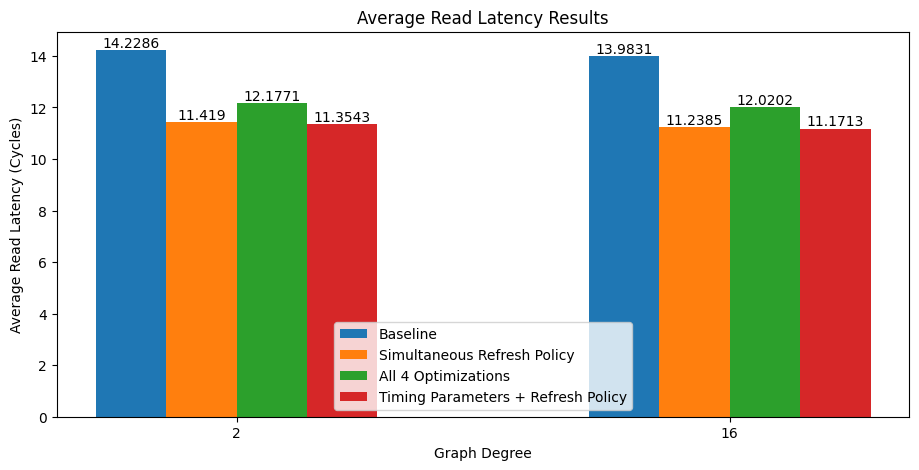

In [123]:
width = 2

degrees = np.array([2, 16])

baseLatency = [base2Latency, base16Latency]
modLatency = [mod2Latency, mod16Latency]
otherLatency = [other2Latency, other16Latency]
refreshLatency = [11.419, 11.2385]

plt.figure(figsize = (11, 5))
bars = plt.bar(x = degrees - 1.5 * width, height = baseLatency, width = width, label = "Baseline")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees - 0.5 * width, height = refreshLatency, width = width, label = "Simultaneous Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 0.5 * width, height = modLatency, width = width, label = "All 4 Optimizations")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 1.5 * width, height = otherLatency, width = width, label = "Timing Parameters + Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)
plt.legend()
plt.xticks([2, 16], [2, 16])
plt.xlabel("Graph Degree")
plt.ylabel("Average Read Latency (Cycles)")
plt.title("Average Read Latency Results")

Text(0.5, 1.0, 'Average Power Results')

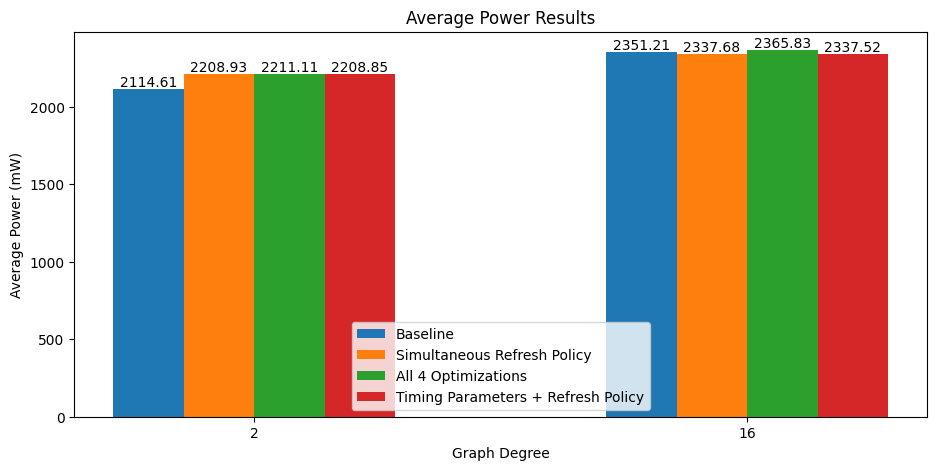

In [124]:
width = 2

degrees = np.array([2, 16])

basePwr = [base2Pwr, base16Pwr]
modPwr = [mod2Pwr, mod16Pwr]
otherPwr = [other2Pwr, other16Pwr]
refreshPwr = [2208.93, 2337.68]

plt.figure(figsize = (11, 5))
bars = plt.bar(x = degrees - 1.5 * width, height = basePwr, width = width, label = "Baseline")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees - 0.5 * width, height = refreshPwr, width = width, label = "Simultaneous Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 0.5 * width, height = modPwr, width = width, label = "All 4 Optimizations")
axes = plt.gca()
axes.bar_label(bars)

bars = plt.bar(x = degrees + 1.5 * width, height = otherPwr, width = width, label = "Timing Parameters + Refresh Policy")
axes = plt.gca()
axes.bar_label(bars)
plt.legend()
plt.xticks([2, 16], [2, 16])
plt.xlabel("Graph Degree")
plt.ylabel("Average Power (mW)")
plt.title("Average Power Results")